In [1]:
import tensorflow as tf

2023-08-22 16:19:36.015721: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


VOC-NOTICE: GPU memory for this assignment is capped at 1024MiB


2023-08-22 16:19:39.105315: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [2]:
from keras.datasets import fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [5]:
#Autoencoder model

encoder = tf.keras.Sequential([ tf.keras.layers.Dense(100, activation = 'relu'),
                               tf.keras.layers.Dense(300, activation = 'relu')])


decoder = tf.keras.Sequential([ tf.keras.layers.Dense(100, activation = 'relu'),
                               tf.keras.layers.Dense(784)])

autoenoder = tf.keras.Sequential([encoder, decoder])

In [6]:
autoenoder.compile(loss='mse', optimizer = 'adam')

In [7]:
autoenoder.fit(x_train, x_train, epochs=100, validation_data=(x_test, x_test))

Epoch 1/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0206 - val_loss: 0.0140
Epoch 2/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0128 - val_loss: 0.0121
Epoch 3/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0114 - val_loss: 0.0116
Epoch 4/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0108 - val_loss: 0.0107
Epoch 5/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0105 - val_loss: 0.0103
Epoch 6/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0104 - val_loss: 0.0104
Epoch 7/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0103 - val_loss: 0.0103
Epoch 8/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0102 - val_loss: 0.0102
Epoch 9/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0102 - val_loss: 0.0103
Epoch 10/100
1875/1875 [==============================] - 7s 4ms/step - l

KeyboardInterrupt: 

In [8]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 1ms/step


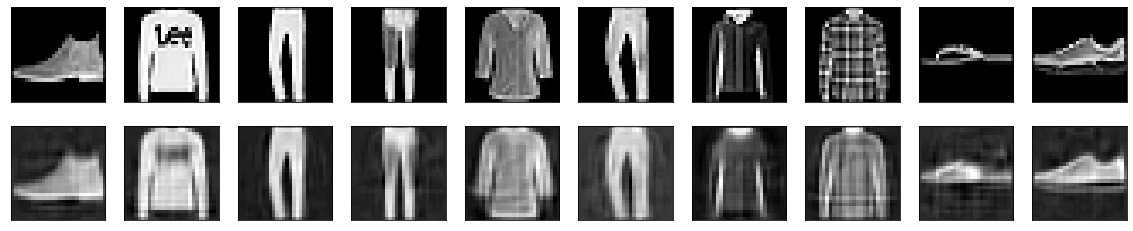

In [9]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()